# üîπUFC Exploratory Data Analysis 

<div style="text-align: center;">
  üîπ <img src="../img/ufc_logo.png" width="50" /> üîπ
</div>

## 1. Import Libraries and Setup Environment

In [2]:
# Import necessary libraries
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get the current working directory
current_dir = os.getcwd()

# Navigate to the project root
project_root = os.path.abspath(os.path.join(current_dir, '..'))

# Import from /src
sys.path.append(os.path.join(project_root, 'src'))
from helpers import *
from io_model import *
from data import UFCData

<div style="text-align: center;">
  üîπ <img src="../img/ufc_logo.png" width="50" /> üîπ
</div>

## 2. Load Data

In [3]:
# Load the cleaned dataset
file_path = os.path.abspath(os.path.join(project_root, 'data', 'processed', 'ufc_etl.csv'))
# Load the CSV into a DataFrame
try:
    ufc_df = pd.read_csv(file_path)
    print_header(f"Data successfully loaded: {ufc_df.shape[0]} rows, {ufc_df.shape[1]} columns.", color='bright_green')
except Exception as e:
    print_header(f"Error loading training data: {e}", color='bright_red')

‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë  Data successfully loaded: 6541 rows, 69 columns.  ‚ïë
‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù


## 3. Initialize UFCData object

In [4]:
ufc_data = UFCData(ufc_df)
ufc_data.summary()

üìä UFC Dataset Summary
----------------------------------------
üß™ Total samples      : 6541
üß™ Train/Test split  : 5232 / 1309
üß™ Total features     : 68

üî¢ Numerical features : 63
üî† Categorical features: 5
    - Binary          : 2
    - Multiclass      : 3

üè∑ Label distribution (raw):
   - Class 0: 3795 (58.0%)
   - Class 1: 2746 (42.0%)

‚úÖ No missing values detected

üìà Feature summary statistics (train set):
                                mean      std     min       max
NumberOfRounds                 3.187    0.580    3.00     5.000
BlueCurrentLoseStreak          0.502    0.798    0.00     5.000
BlueCurrentWinStreak           0.959    1.391    0.00    12.000
BlueDraws                      0.023    0.155    0.00     2.000
BlueAvgSigStrLanded           19.800   18.830    0.00   154.000
BlueAvgSigStrPct               0.453    0.105    0.00     1.000
BlueAvgSubAtt                  0.500    0.634    0.00     8.400
BlueAvgTDLanded                1.315    1.261    0

<div style="text-align: center;">
  üîπ <img src="../img/ufc_logo.png" width="50" /> üîπ
</div>

## 4.  Initial Data Exploration

In [5]:
# View the first few rows of the training data
ufc_df.head()

TitleBout Gender  NumberOfRounds  BlueCurrentLoseStreak  \
0      False   MALE               5                      0   
1      False   MALE               3                      1   
2      False   MALE               3                      0   
3      False   MALE               3                      2   
4      False   MALE               3                      0   

   BlueCurrentWinStreak  BlueDraws  BlueAvgSigStrLanded  BlueAvgSigStrPct  \
0                     5          0                 4.13              0.36   
1                     0          0                 7.36              0.56   
2                     4          0                 3.32              0.48   
3                     0          1                 5.50              0.47   
4                     4          0                 5.94              0.52   

   BlueAvgSubAtt  BlueAvgTDLanded  ...  SubDif  HeightDif  ReachDif  AgeDif  \
0            0.0             1.96  ...      -2      -2.54     10.16      -6   
1            1.1             1.24  ...      -1       5.08      0.00      -5   
2            0.2             2.26  ...       1      -2.54     -7.62       3   
3            0.0             0.36  ...      -1       2.54     -2.54       9   
4            0.0             0.25  ...       0       0.00     -2.54       0   

   SigStrDif  AvgSubAttDif  AvgTDDif  BetterRank  TotalFightTimeSecs  label  
0       0.25          -0.2     -1.83         Red               882.0      1  
1       2.69           0.7      0.20     neither               696.0      0  
2      -1.12          -0.2      1.72         Red               717.0      0  
3       2.68          -0.8     -3.62     neither               824.0      1  
4      -0.57           0.0      0.25     neither               900.0      1  

[5 rows x 69 columns]

<div style="text-align: center;">
  üîπ <img src="../img/ufc_logo.png" width="50" /> üîπ
</div>

### Visualizing the Distribution of the Target Variable

In [6]:
ufc_data.plot_label_distribution(dataset = 'test')

<div style="text-align: center;">
  üîπ <img src="../img/ufc_logo.png" width="50" /> üîπ
</div>

## 5. Univariate Analysis of Features (X)

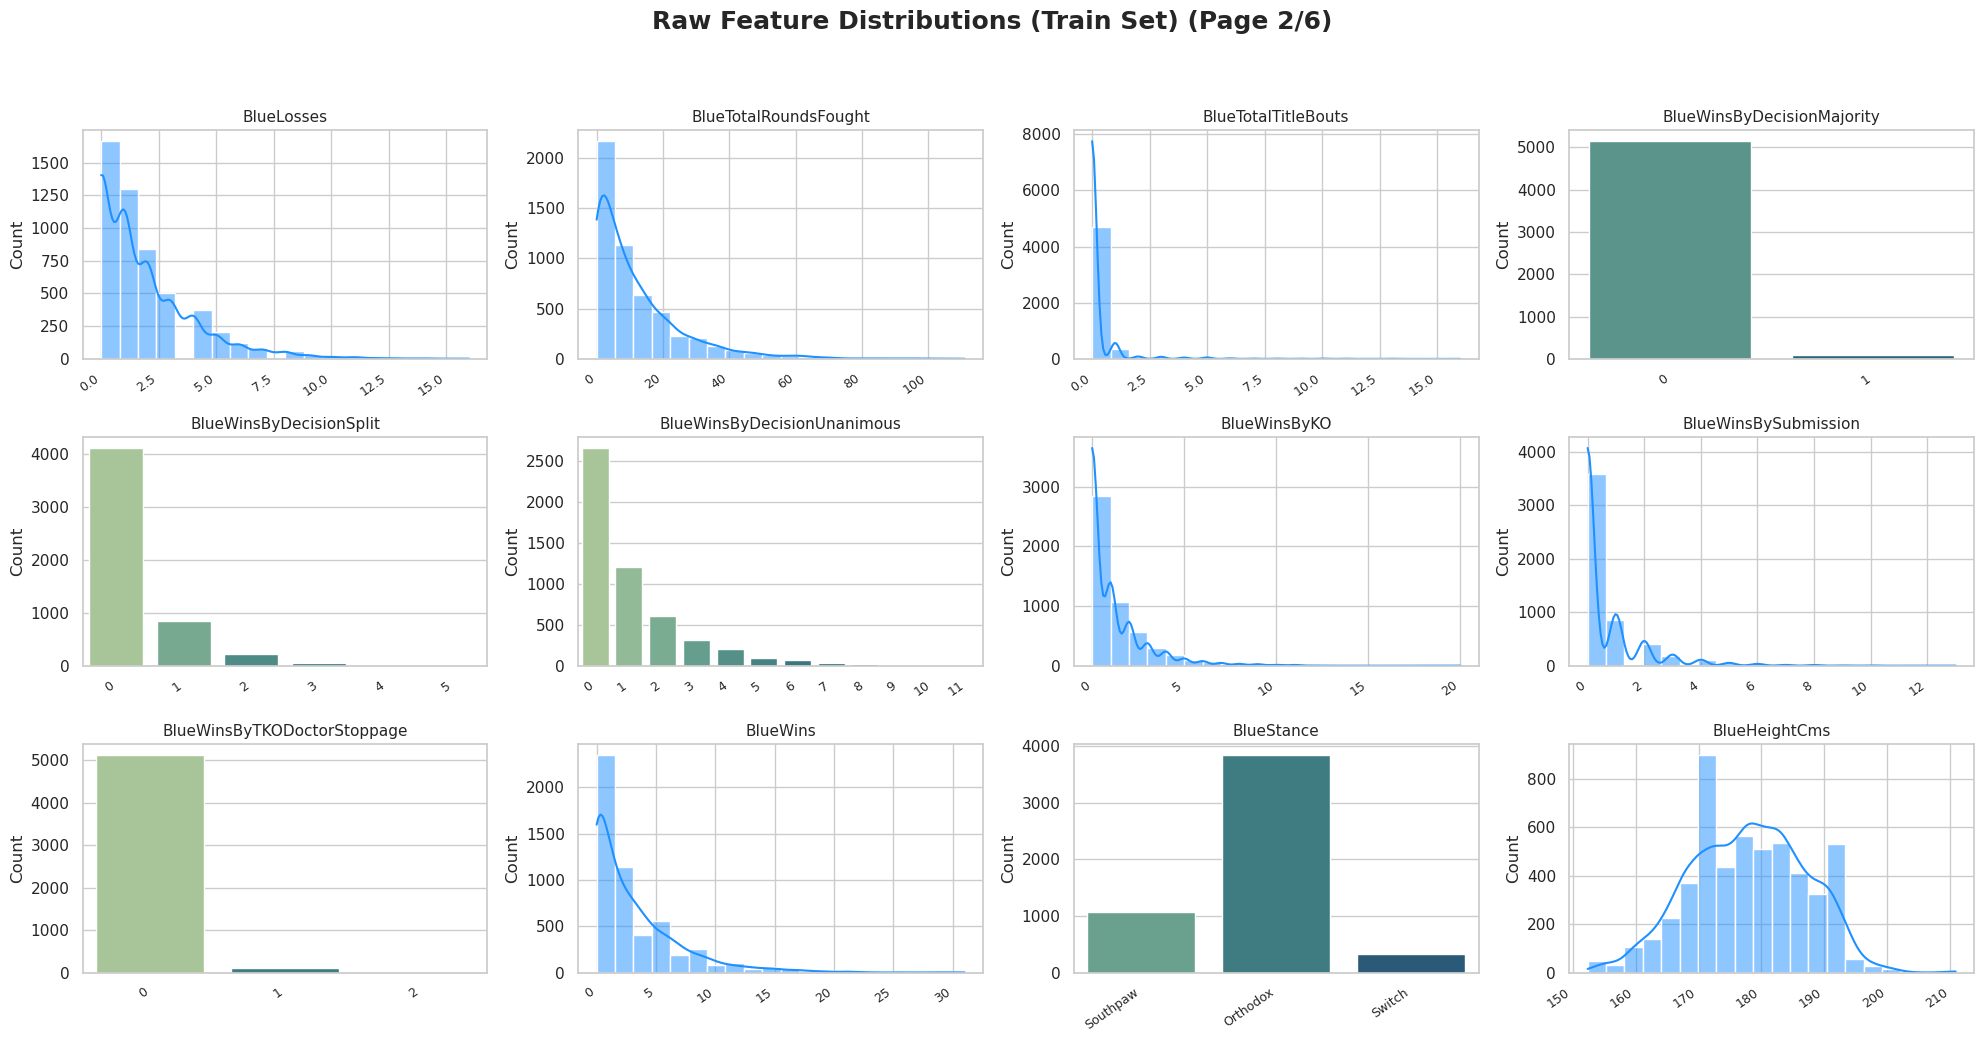

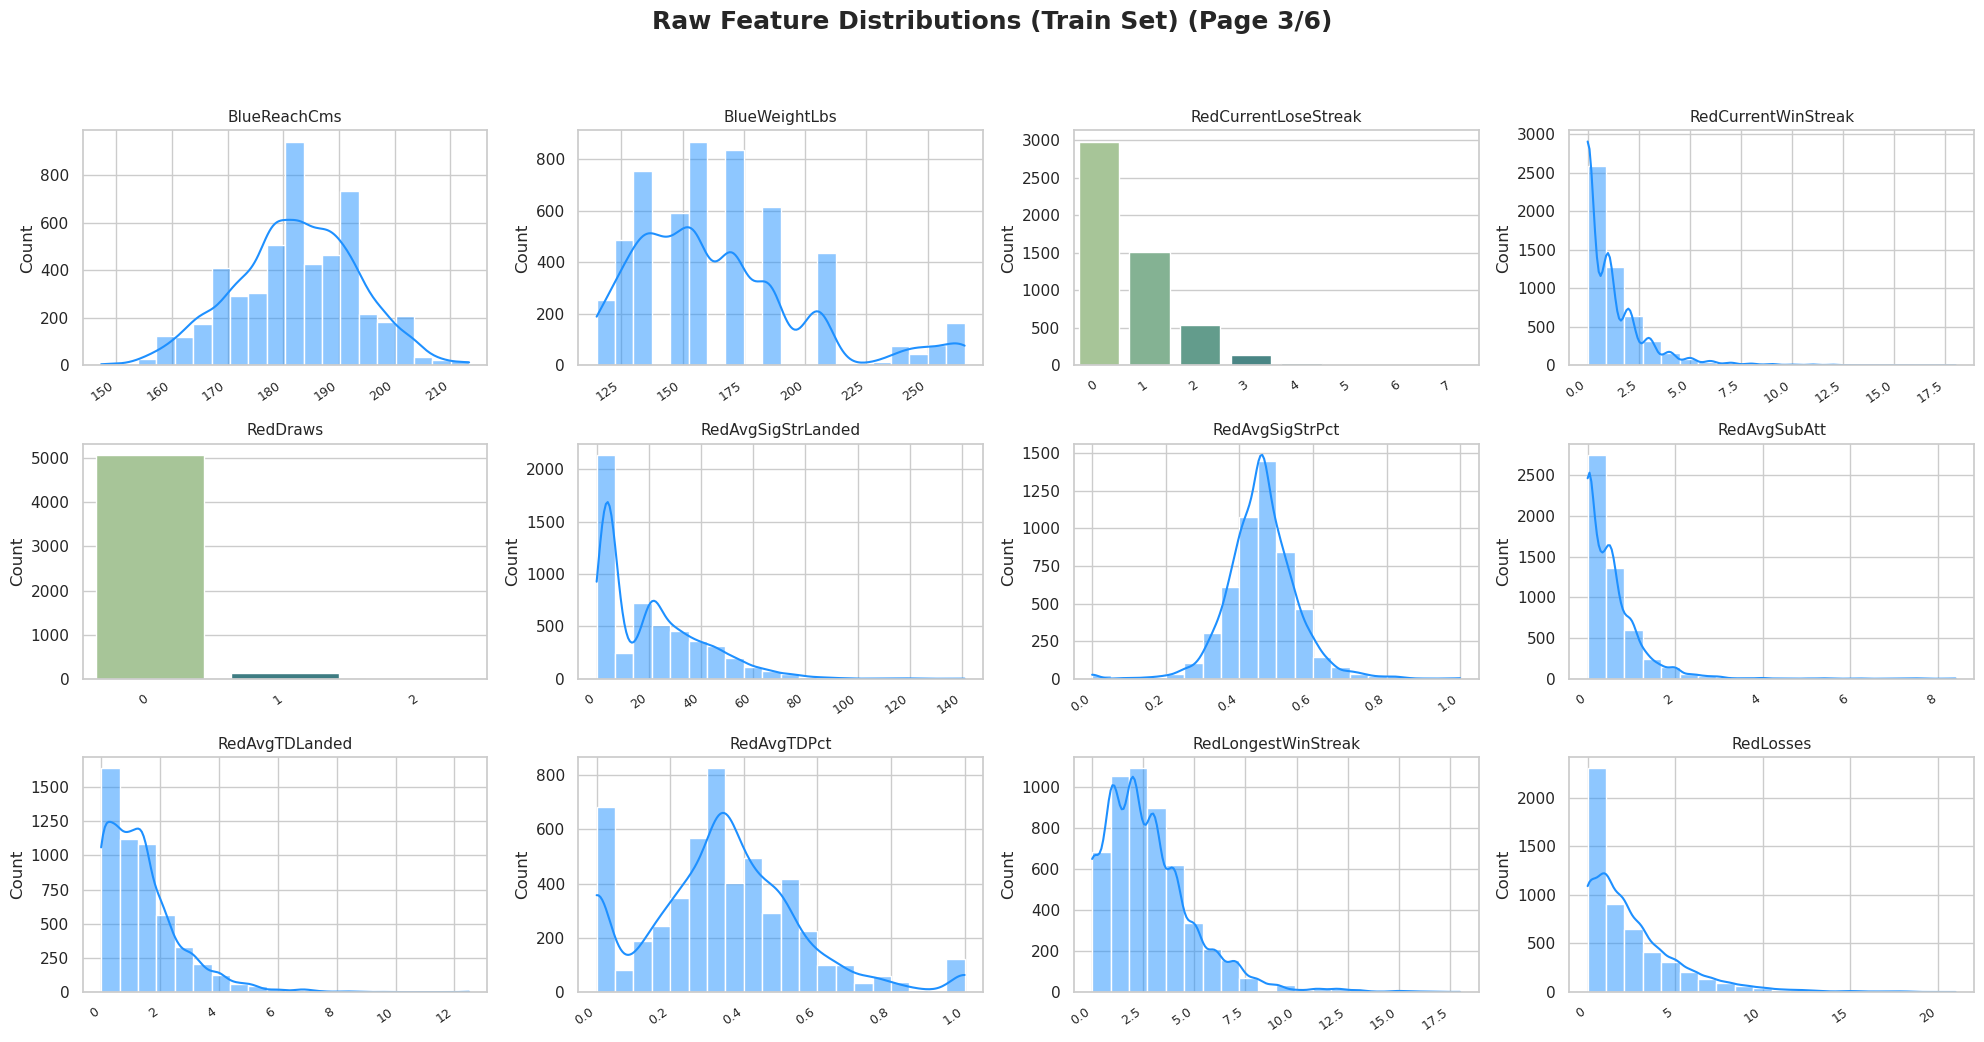

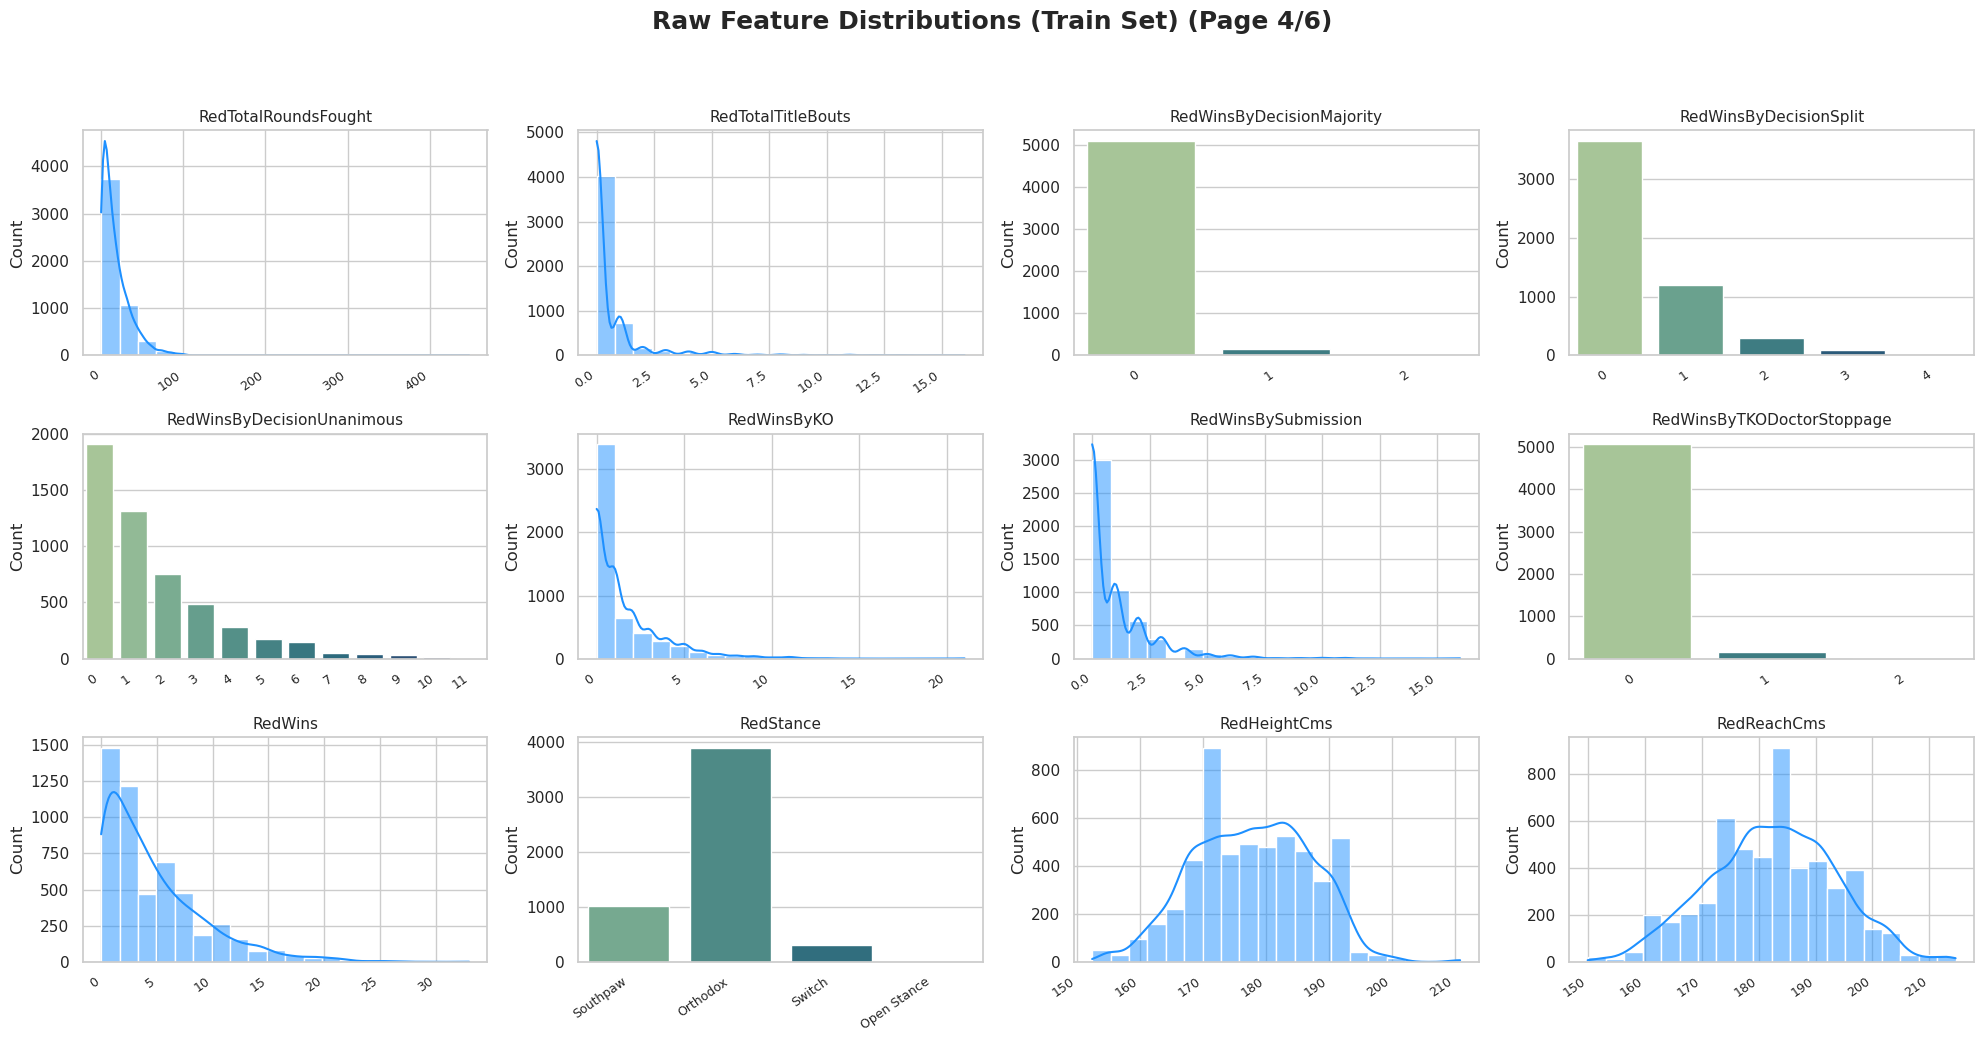

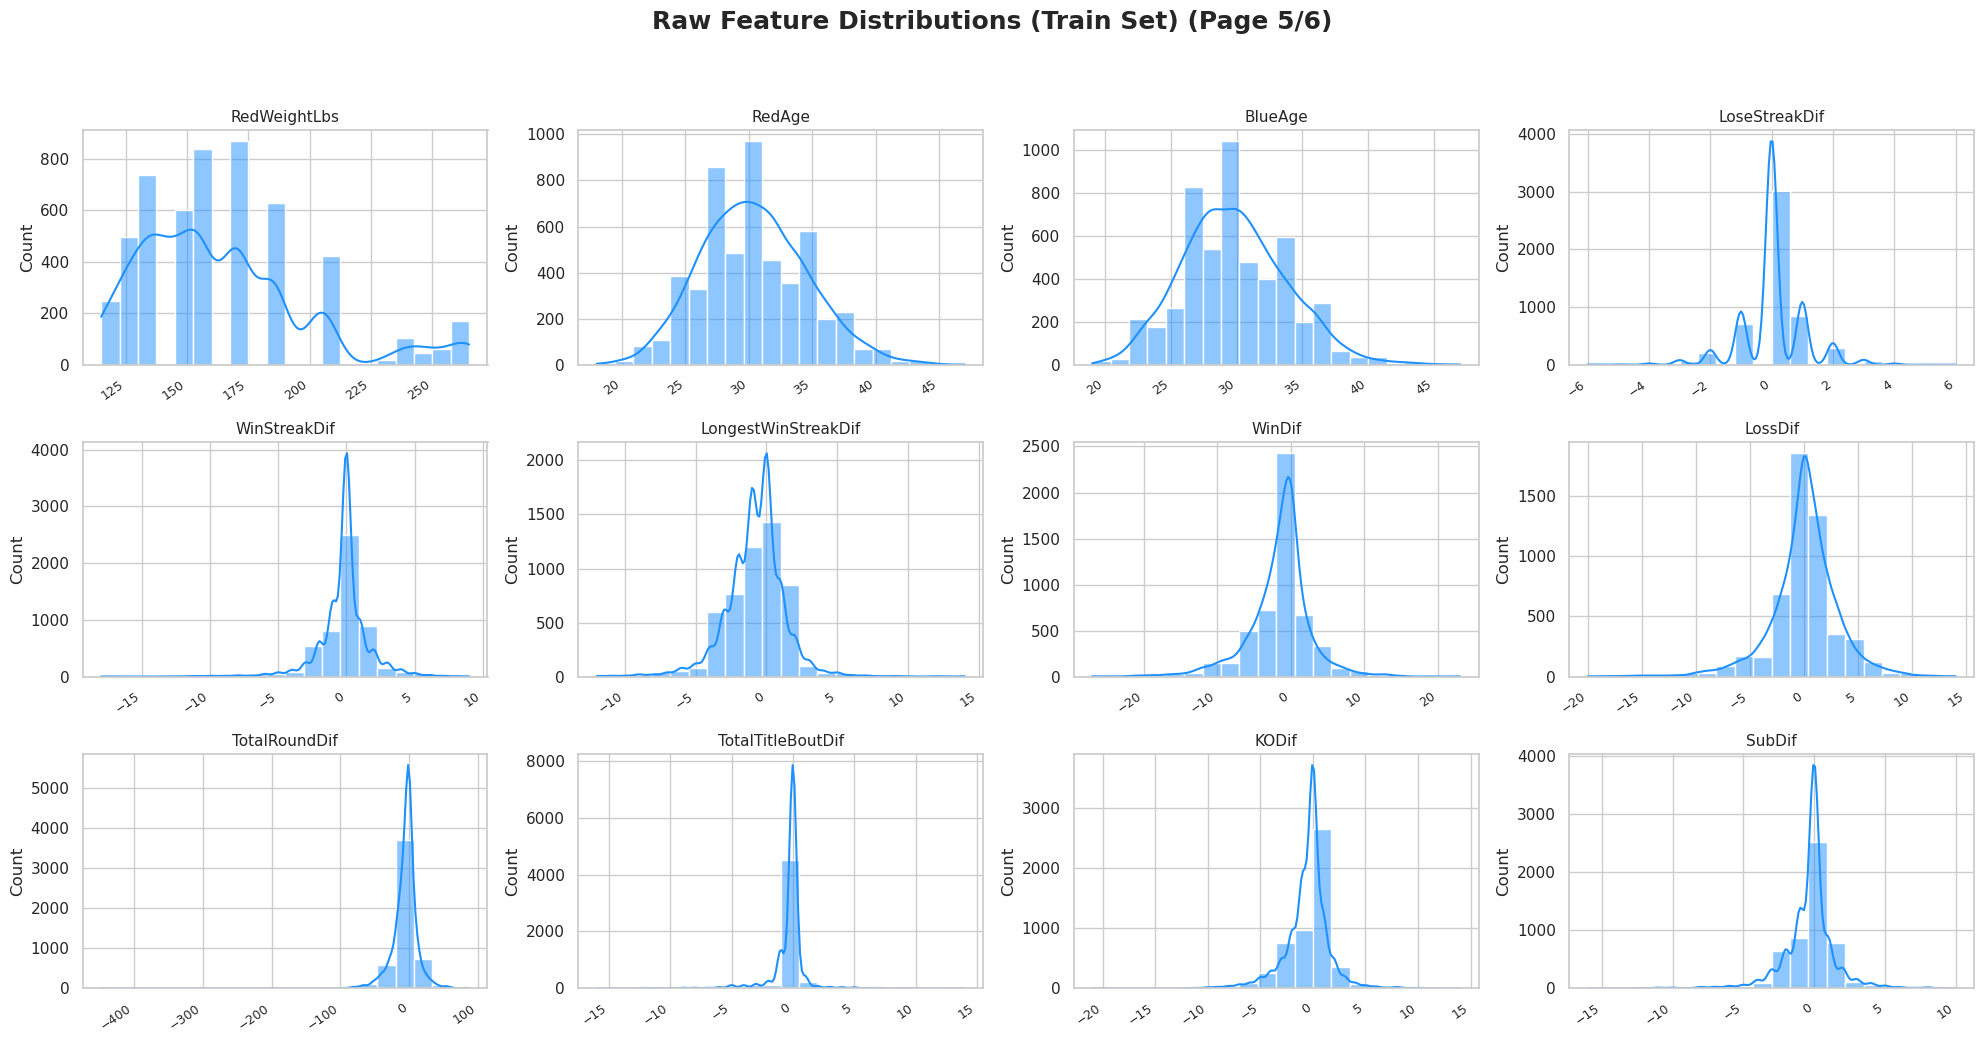

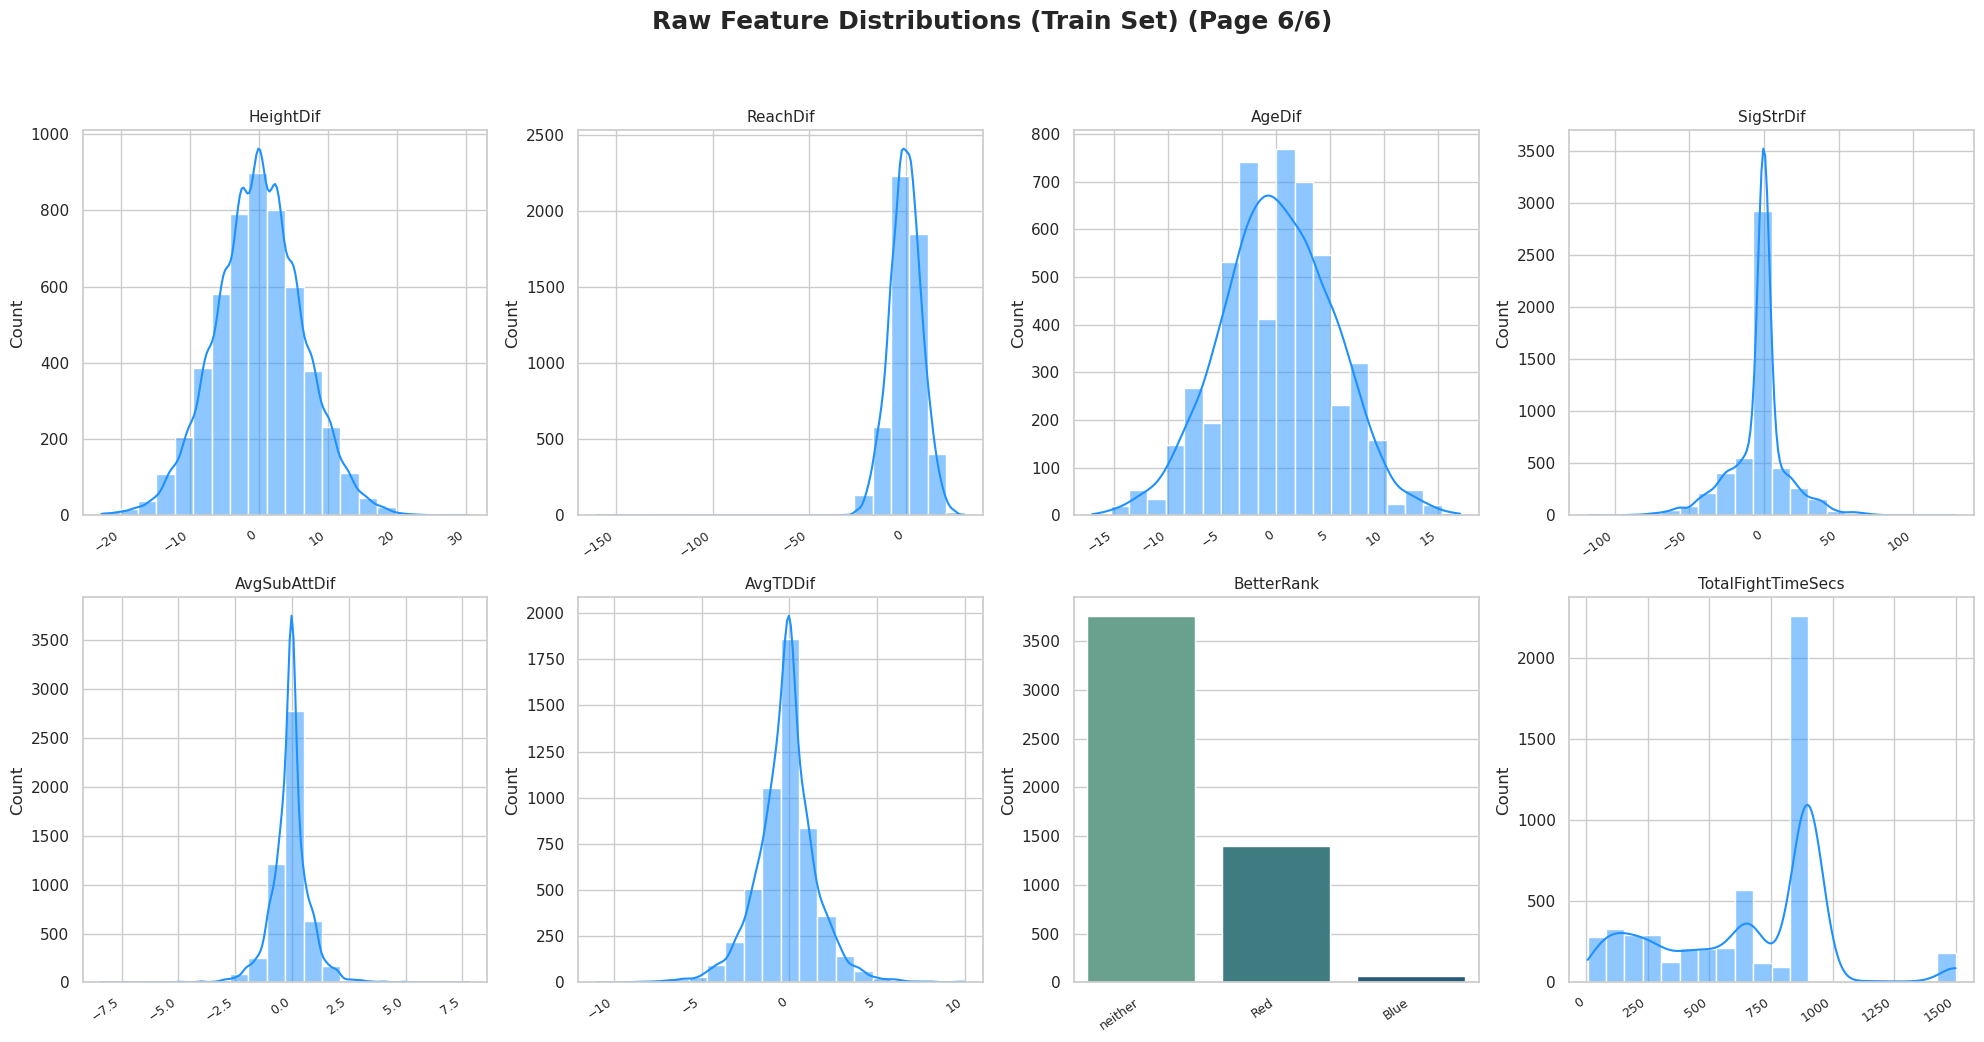

In [7]:
# Histograms of the predictor features
ufc_data.plot_feature_distributions()

<div style="text-align: center;">
  üîπ <img src="../img/ufc_logo.png" width="50" /> üîπ
</div>

## 6. Correlation Between Features

In [8]:
ufc_data.compute_corr()

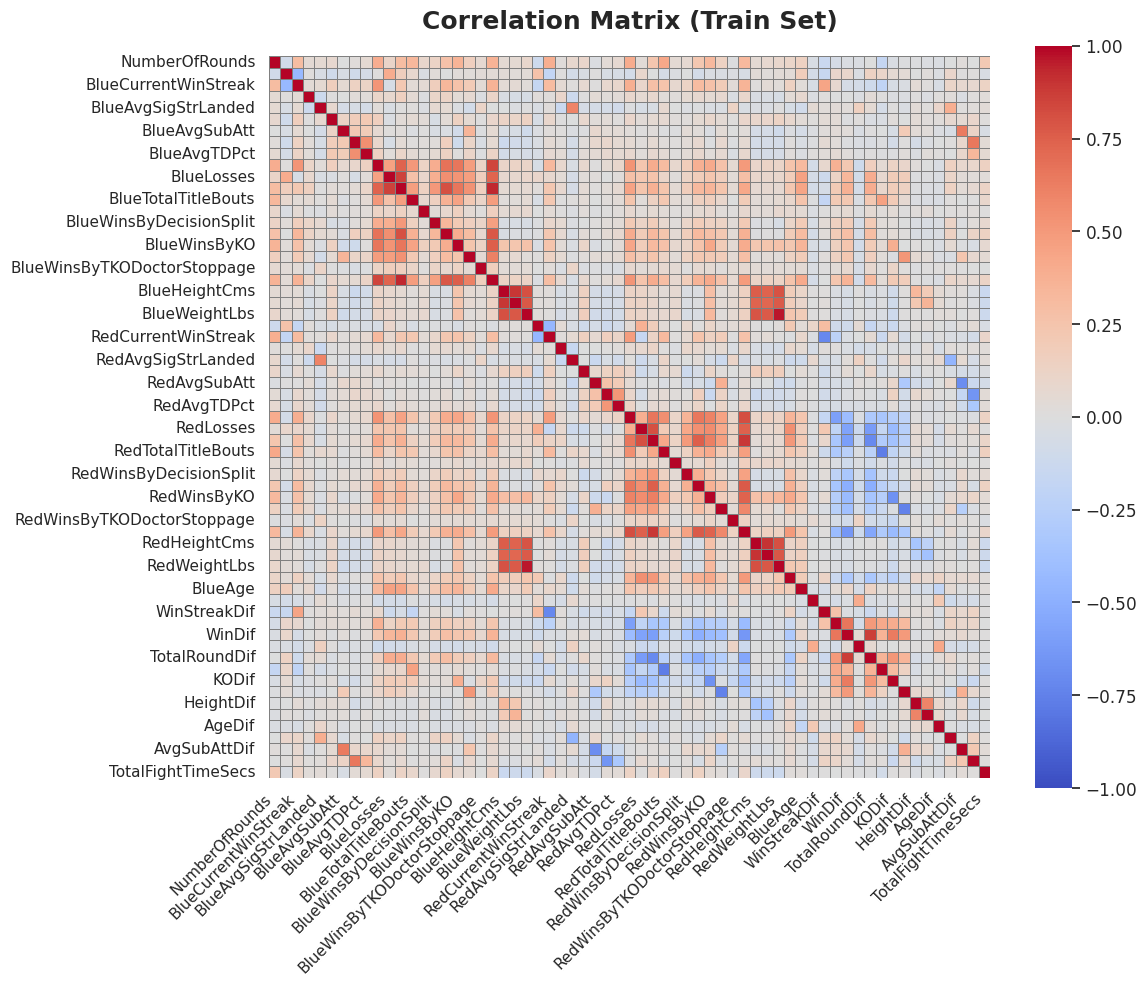

In [9]:
ufc_data.plot_corr()

<div style="text-align: center;">
  üîπ <img src="../img/ufc_logo.png" width="50" /> üîπ
</div>

<div style="text-align: center;">
     <img src="../img/ufc_logo.png" width="800" /> 
</div>